# Linear Regression on House Prices

Assume that I have been asked to help a real estate agent to predict house prices. The agent has collected some data for house sales in a neighborhood. The data is stored in the file $\texttt{house\_prices.csv}$. The data contains the following columns:

- `Total Area`: The total area of the house in square feet.
- `Age of the House`: The age of the house in years.
- `Distance to the City Center`: The distance of the house to the city center in miles.
- `Price`: The price of the house.

The agent has tried to fit a linear regression model to the data but the results were not satisfactory. The agent has tried to fit the following model:

$$ \text{Price} \approx \beta_0 + \beta_1 \text{Total Area} + \beta_2 \text{Age of the House} + \beta_3 \text{Distance to the City Center} $$

This model, however, does not seem to capture the relationship between the features and the price and predictions are off by a large margin.

Name features

- `Total Area`: `X1`
- `Age of the House`: `X2`
- `Distance to the City Center`: `X3`

Name target
- `Price`: `y`

As a sanity check, I will fit the naive linear model above to the data, taking the first 80% of the data for training and the remaining 20% for testing.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Load the data
house_prices = pd.read_csv("data/house_prices.csv")

# Name features and target
house_prices = house_prices.rename(columns={
    'Total Area': 'X1',
    'Age of House': 'X2',
    'Distance to City Center': 'X3',
    'Price': 'y'
})

In [3]:
# Fit the naive linear model above to the data (take 80% of the data for training)

# Define the model
X_1 = house_prices[['X1', 'X2', 'X3']]
y_1 = house_prices['y']

# Split the data into training and test sets
n_train = int(0.8 * len(X_1))
X_1_train = X_1[:n_train]
y_1_train = y_1[:n_train]
X_1_test = X_1[n_train:]
y_1_test = y_1[n_train:]

# Add a constant to the model (the intercept term)
X_1_train = sm.add_constant(X_1_train)

# Fit the model
results_1 = sm.OLS(y_1_train, X_1_train).fit()

In [4]:
# Display the summary of the model
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3435.
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          8.98e-241
Time:                        10:15:44   Log-Likelihood:                -3371.3
No. Observations:                 320   AIC:                             6751.
Df Residuals:                     316   BIC:                             6766.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.607e+05   1963.098    285.622      0.0

Key points from the results:

- Within the 95% confidence interval, `X1` has a positive coefficient. This makes sense: I would expect a positive correlation between `Total Area` and `Price`.
- Within the 95% confidence interval, `X2` has a negative coefficient. This makes sense: I would expect a negative correlation between `Age of the House` and `Price`.
- Within the 95% confidence interval, `X3` has a negative coefficient. This makes sense: I would expect a negative correlation between `Distance to the City Center` and `Price`.
- The result of the Omnibus test is significantly greater than 0. This indicates that the residuals are not normally distributed.
- Similarly, `Prob(JB)` is very close to 0. This also indicates that the residuals are not normally distributed.
- The negative value of skew indicates negative skewness in the residuals, which means that the lower tail of the distribution is longer.
- The value of kurtosis indicates that the distribution of the residuals has heavy tails and a large peak.
- The result of the Durbin-Watson test is close to 2. This indicates that there is no autocorrelation in the residuals.

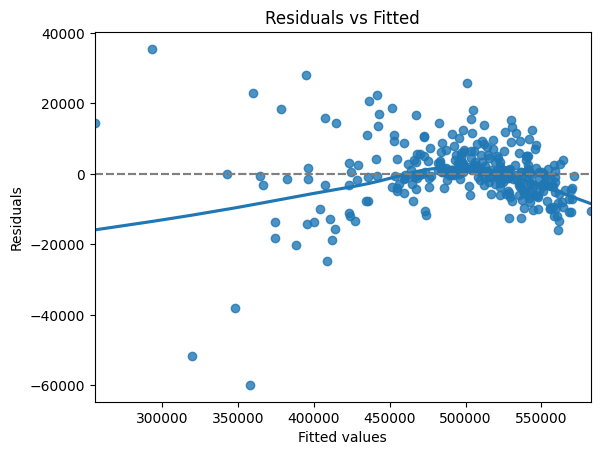

In [5]:
# Plot the residuals against the fitted values
fitted_values_1 = results_1.fittedvalues
residuals_1 = results_1.resid
sns.residplot(x=fitted_values_1, y=residuals_1, lowess=True)
plt.axhline(0, color='grey', linestyle='dashed')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

This plot indicates that the linear regression assumptions are not satisfied.

At lower values of `Fitted values`, the residuals are in general significantly less than 0. As `Fitted Values` increases, the residuals also tend to increase until `Fitted Values` of around 500,000 where the residuals are in general greater than 0. At higher values of `Fitted Values`, the residuals are in general less than 0.

This clear trend in the residuals indicates an unmodelled relationship between the target variable (`Price`) and and the feature variables (`Total Area`, `Age of the House`, `Distance to the City Center`).

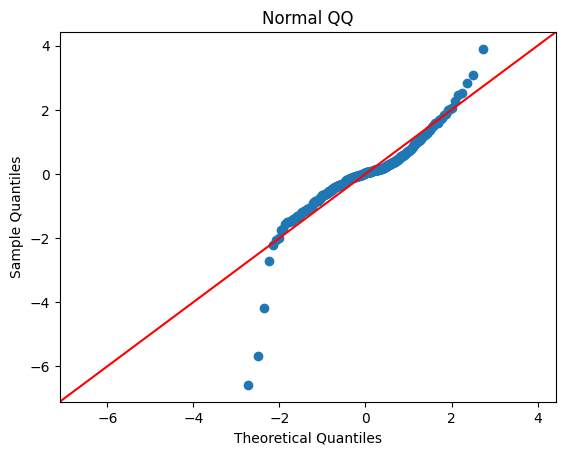

In [6]:
# Plot the Normal QQ plot of the residuals
sm.qqplot(residuals_1, line='45', fit=True)
plt.title('Normal QQ')
plt.show()

This plot indicates that the linear regression assumptions are not satisfied. Since the data points do not follow a straight line, the QQ plot indicates that the residuals are not normally distributed. Furthermore, this plot shows that the residuals follow a distribution with heavy tails.

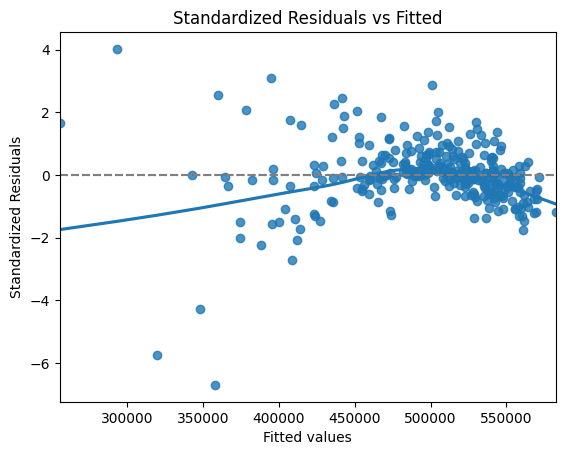

In [7]:
# Plot the standardized residuals against the fitted values
standardized_residuals_1 = results_1.get_influence().resid_studentized_internal
sns.residplot(x=fitted_values_1, y=standardized_residuals_1, lowess=True)
plt.axhline(0, color='grey', linestyle='dashed')
plt.xlabel('Fitted values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Fitted')
plt.show()

The same trend in the residuals is present in this plot as that presented in question 1. (b). However, it should be noted that we know the residuals are not normally distributed. Therefore, the values on the y-axis cannot be interpreted as standard deviations from the mean.

In [8]:
# Compute test error on the test data (20%)
X_1_test = sm.add_constant(X_1_test)
y_1_pred = results_1.predict(X_1_test)
y_1_err = y_1_test - y_1_pred

# Provide the test MSE
mse_1 = np.mean(y_1_err ** 2)
print('Test MSE of naive linear model: ', mse_1)

Test MSE of naive linear model:  188065790.17400494


Conclusions on the naive linear model.

- As indicated by the Omnibus and Jarque-Bera tests and the QQ plot presented in part 1. (c), the residuals are not normally distributed.
- As indicated by the clear trend in the residuals visible in the plots presented in parts 1. (b) & (d), there is an unmodelled relationship between the target variable (`Price`) and the feature variables (`Total Area`, `Age of the House`, `Distance to the City Center`).
- For these, the assumptions of the linear regression are not satisfied.
- It is therefore not surprising that predictions are off by a large margin and the test MSE is large.

I have verified that the fit is indeed not satisfactory, so will fit a more flexible model, taking 80% of the data for training as above.

Notes:

- *Interaction effects:* The model seems to assume linear relationships between the features and the price. However, this does not take into account any interactions. For example, while age of the house might be negatively correlated with the price, this is possibly offset by distance to the city center.
- *Feature transforms:* Some features might not be linearly related to the price. For example, while total area might be related to the price in a linear-like fashion for relatively small houses, the price-area relationship might be completely nonexistent for large houses (e.g. mansions).
- Data is simulated and does not represent any real world data, therefore do not try to interpret the results too much.

If there is an interaction between `X1` and `X2`, then the change in `y` with 1 unit change in `X1` will depend on the value of `X2`.

To identify interaction effects, I will take a graphical approach. Specifically, to assess whether or not there is an interaction between `X1` and `X2`, plot `y` against `X1` using data points that are the top and bottom 20% of `X2`.

In [9]:
def plot_interaction(feature1, feature2, percentile):

    # Calculate the top and bottom percentiles of feature_2
    top_percentile_feature2 = house_prices[feature2].quantile(1 - percentile / 100)
    bottom_percentile_feature2 = house_prices[feature2].quantile(percentile / 100)

    # Filter data for the top and bottom percentiles of feature_2
    top_data_feature2 = house_prices[house_prices[feature2] >= top_percentile_feature2]
    bottom_data_feature2 = house_prices[house_prices[feature2] <= bottom_percentile_feature2]

    # Fit linear regression models and plot for the top and bottom percentiles to guide the eye
    # Top percentile
    X_top = sm.add_constant(top_data_feature2[feature1])
    y_top = top_data_feature2['y']
    model_top = sm.OLS(y_top, X_top).fit()
    plt.plot(X_top[feature1], model_top.fittedvalues,
             label='Linear regression line', color='C0')
    # Bottom percentile
    X_bottom = sm.add_constant(bottom_data_feature2[feature1])
    y_bottom = bottom_data_feature2['y']
    model_bottom = sm.OLS(y_bottom, X_bottom).fit()
    plt.plot(X_bottom[feature1], model_bottom.fittedvalues,
             label='Linear regression line', color='C1')

    # Plot the data points
    plt.scatter(X_top[feature1], y_top,
                label=f'Data points for top {percentile}% of {feature2}',
                alpha=0.5, color='C0')
    plt.scatter(X_bottom[feature1], y_bottom,
                label=f'Data points for bottom {percentile}% of {feature2}',
                alpha=0.5, color='C1')

    plt.title(f'Interaction between {feature1} and {feature2} on y')
    plt.xlabel(feature1)
    plt.ylabel('y')
    plt.legend()
    plt.show()

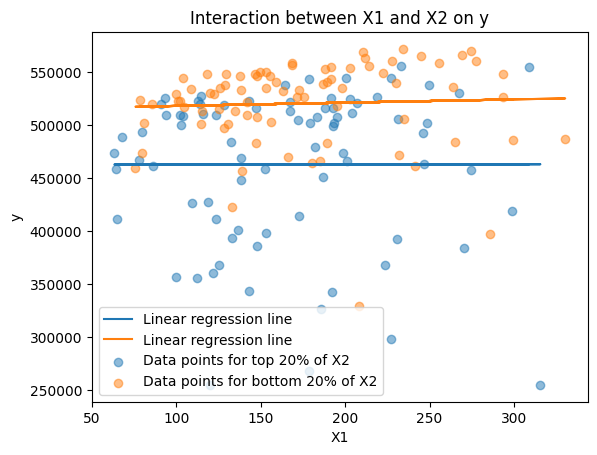

In [10]:
plot_interaction('X1', 'X2', 20)

This plot gives no indication that `X1` interacts with `X2`. There is not a noticeable difference between the variation of `y` with `X1` for the data corresponding to the top 20% of `X2` (blue) and the data corresponding to the bottom 20% of `X2` (orange).

Personally I find this surprising. I would expect the `Price` increase from 1 extra square foot in `Total Area` to depend on `Age of the House`. However, this is the purpose of examining the data. Furthermore, the question says data is simulated and does not represent any real world data, therefore do not try to interpret the results too much.

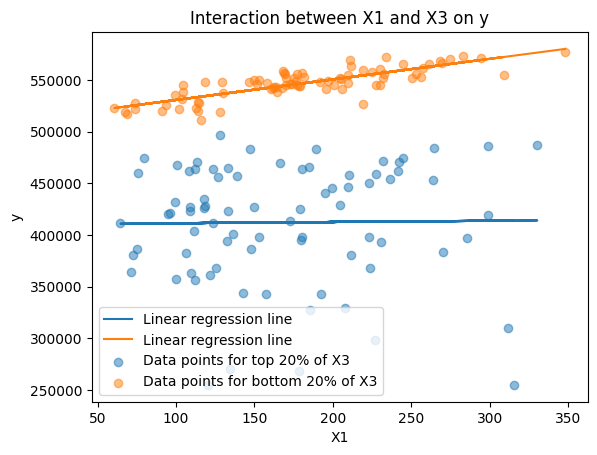

In [11]:
plot_interaction('X1', 'X3', 20)

This plot indicates that `X1` interacts with `X3`. There is a noticeable difference between the variation of `y` with `X1` for the data corresponding to the top 20% of `X3` (blue) and the data corresponding to the bottom 20% of `X3` (orange).

This makes sense. I would expect the `Price` increase from one extra square foot to depend on `Distance to the City Center`.

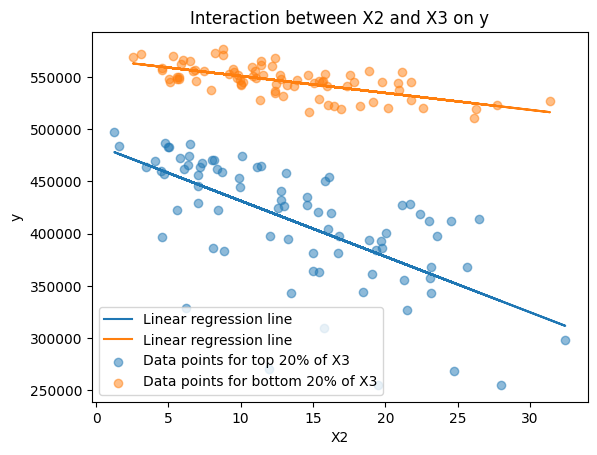

In [12]:
plot_interaction('X2', 'X3', 20)

This plot indicates that `X2` interacts with `X3`. There is a noticeable difference between the variation of `y` with `X2` for the data corresponding to the top 20% of `X3` (blue) and the data corresponding to the bottom 20% of `X3` (orange).

This makes sense. I would expect the `Price` increase from one extra year in `Age of the House` to depend on `Distance to the City Center`. Indeed, this is hinted in the question.

In [13]:
# Create new interaction features
house_prices['X1_X3_interaction'] = house_prices['X1'] * house_prices['X3']
house_prices['X2_X3_interaction'] = house_prices['X2'] * house_prices['X3']

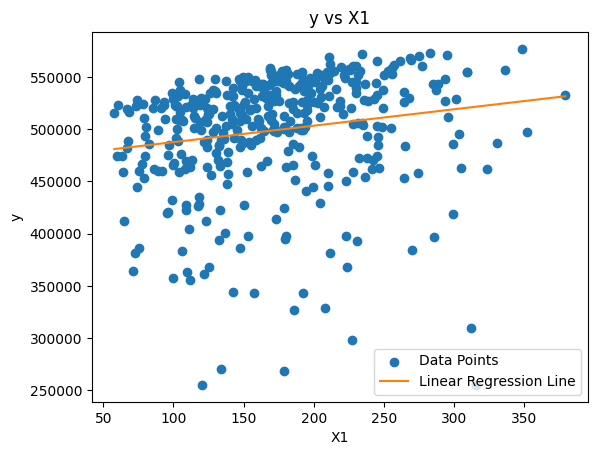

In [14]:
# Sort the data by X1
house_prices_sorted = house_prices.sort_values(by='X1')

# Set up the plot
plt.scatter(house_prices_sorted['X1'], house_prices_sorted['y'],
            label='Data Points')
plt.xlabel('X1')
plt.ylabel('y')

# Fit the model using just X1 as a feature
X_linear = sm.add_constant(house_prices_sorted['X1'])
model_linear = sm.OLS(house_prices_sorted['y'], X_linear).fit()
y_pred_linear = model_linear.fittedvalues
plt.plot(house_prices_sorted['X1'], y_pred_linear, color='C1',
         label='Linear Regression Line')

plt.legend()
plt.title('y vs X1')
plt.show()

As hinted in question, `Price` varies nonlinearly with `Total Area`. As `Total Area` increases, so too does `Price`. However, this saturates at higher values of `Total Area`. To capture this, I will transform $\text{X1}$ to $\sqrt{\text{X1}}$. Note: I am aware that $\text{log(X1)}$ could also be employed in a situation like this. However, I think $\text{log}$ flattens off too quickly for this specific situation.

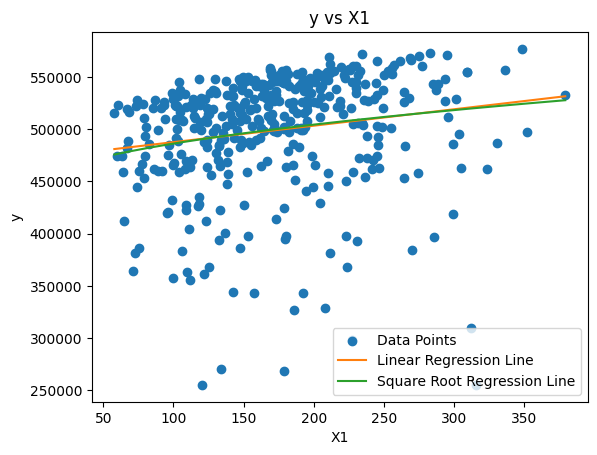

In [15]:
# Add sqrt(X1) as a feature
house_prices['X1_sqrt'] = house_prices['X1'] ** 0.5

# Sort the data by X1
house_prices_sorted = house_prices.sort_values(by='X1')

# Set up the plot
plt.scatter(house_prices_sorted['X1'], house_prices_sorted['y'],
            label='Data Points')
plt.xlabel('X1')
plt.ylabel('y')

# Fit the model using just X1 as a feature
X_linear = sm.add_constant(house_prices_sorted['X1'])
model_linear = sm.OLS(house_prices_sorted['y'], X_linear).fit()
y_pred_linear = model_linear.fittedvalues
plt.plot(house_prices_sorted['X1'], y_pred_linear, color='C1',
         label='Linear Regression Line')

# Fit the model using just sqrt(X1) as a feature
X_sqrt = sm.add_constant(house_prices_sorted['X1_sqrt'])
model_sqrt = sm.OLS(house_prices_sorted['y'], X_sqrt).fit()
y_pred_sqrt = model_sqrt.fittedvalues
plt.plot(house_prices_sorted['X1'], y_pred_sqrt, color='C2',
         label='Square Root Regression Line')

plt.legend()
plt.title('y vs X1')
plt.show()

To capture the interaction between `X1` and `X3`, and `X2` and `X3`, my final model will include the features `interaction_X1_X3`, and `interaction_X2_X3`.

Furthermore, to capture the nonlinearity of the variation of `y` with `X1`, I will replace `X1` with `X1**0.5`.

My proposed final model is therefore as below.

$$ \text{Price} \approx \beta_0 + \beta_1 \sqrt{\text{X1}} + \beta_2 \text{X2} + \beta_3 \text{X3} + \beta_4 \text{X1X3} + \beta_5 \text{X2X3} $$

In [16]:
# Fit the my proposed final model to the data (take 80% of the data for training)

# Define the model
X_2 = house_prices[['X1_sqrt', 'X2', 'X3', 'X1_X3_interaction', 'X2_X3_interaction']]
y_2 = house_prices['y']

# Split the data into training and test sets
X_2_train = X_2[:n_train]
y_2_train = y_2[:n_train]
X_2_test = X_2[n_train:]
y_2_test = y_2[n_train:]

# Add a constant to the model (the intercept term)
X_2_train = sm.add_constant(X_2_train)

# Fit the model
results_2 = sm.OLS(y_2_train, X_2_train).fit()

# Display the summary of the model
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.997e+06
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:15:47   Log-Likelihood:                -2274.9
No. Observations:                 320   AIC:                             4562.
Df Residuals:                     314   BIC:                             4584.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.999e+05    156.86

Key points from the results:

- The result of the Omnibus test is significantly greater than 0. This indicates that the residuals are not normally distributed.
- Similarly, `Prob(JB)` is very close to 0. This also indicates that the residuals are not normally distributed.
- The value of skew is close to 0. This indicates little skewness in the residuals, which means that the lower and upper tails of the distribution are roughly the same.
- The value of kurtosis indicates that the distribution of the residuals has light tails and a small peak.
- The result of the Durbin-Watson test is close to 2. This indicates that there is no autocorrelation in the residuals.

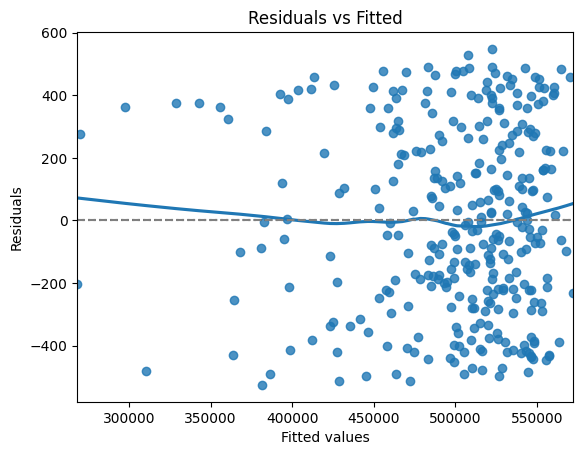

In [17]:
# Plot the residuals against the fitted values
fitted_values_2 = results_2.fittedvalues
residuals_2 = results_2.resid
sns.residplot(x=fitted_values_2, y=residuals_2, lowess=True)
plt.axhline(0, color='grey', linestyle='dashed')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

There are no obvious patterns. This plot therefore indicates that my proposed final model successfully captures the systematic relationship between the target variable and and the feature variables.

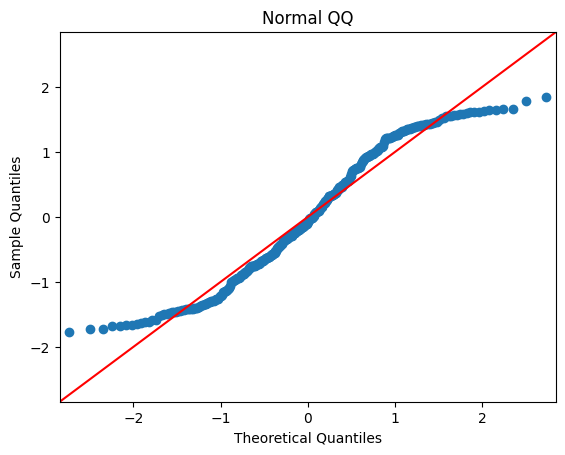

In [18]:
# Plot the Normal QQ plot of the residuals
sm.qqplot(residuals_2, line='45', fit=True)
plt.title('Normal QQ')
plt.show()

This plot indicates that the linear regression assumptions are not satisfied. Since the data points do not follow a straight line, the QQ plot indicates that the residuals are not normally distributed. Furthermore, this plot shows that the residuals follow a distribution with light tails.

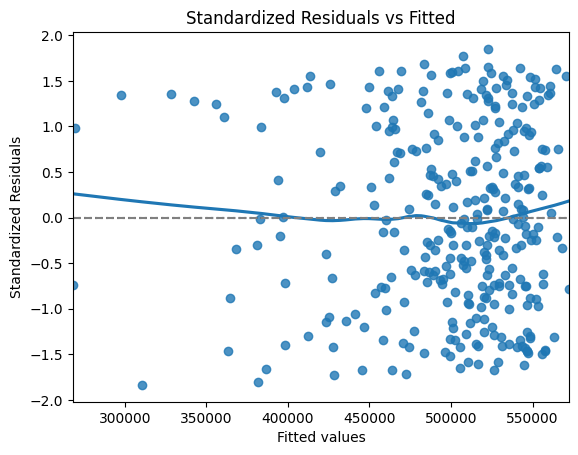

In [19]:
# Plot the standardized residuals against the fitted values
standardized_residuals_2 = results_2.get_influence().resid_studentized_internal
sns.residplot(x=fitted_values_2, y=standardized_residuals_2, lowess=True)
plt.axhline(0, color='grey', linestyle='dashed')
plt.xlabel('Fitted values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Fitted')
plt.show()

The same trend in the residuals is present in this plot as that presented in question 2. (d). However, it should be noted that we know the residuals are not normally distributed. Therefore, the values on the y-axis cannot be interpreted as standard deviations from the mean.

In [20]:
# Compute test error on the test data (20%)
X_2_test = sm.add_constant(X_2_test)
y_2_pred = results_2.predict(X_2_test)
y_2_err = y_2_test - y_2_pred

# Provide the test MSE
mse_2 = np.mean(y_2_err ** 2)
print('Test MSE of my proposed final model: ', mse_2)

Test MSE of my proposed final model:  82065.48296209963


There is a significant improvement compared with the naive linear model.

My proposed final model significantly outperforms the naive linear model.

- For my proposed final model, the value of skew is close to 0. This indicates little skewness in the residuals, which means that the lower and upper tails of the distribution are roughly the same. This is consistent with the assumptions of linear regression, and is not the case with the naive linear model.
- There are no obvious patterns in the Residuals vs Fitted values plot for my proposed final model, which is not the case for the naive linear model. This indicates that, unlike the naive linear model, my proposed final model successfully captures the systematic relationship between the target variable and and the feature variables.
- The residuals for my proposed final model are much smaller in absolute value than those for the naive linear model.
- The test MSE for my proposed final model is four orders of magnitude smaller than that for the naive linear model. This is a significant improvement.

It must be noted, however, that not all linear regression assumptions are satisfied by my proposed final model. Indeed, the residuals do not appear to follow a normal distribution. However, the question does say that final plots may not still exactly satisfy the linear regression visual diagnostics, but they should be much better than the naive linear model. For the reasons discussed above, this is clearly the case.